# 模块导入

In [9]:
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegressionCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils



# 1.数据处理

In [10]:
# 加载数据
iris = sns.load_dataset('iris')

In [11]:
iris.shape

(150, 5)

In [12]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


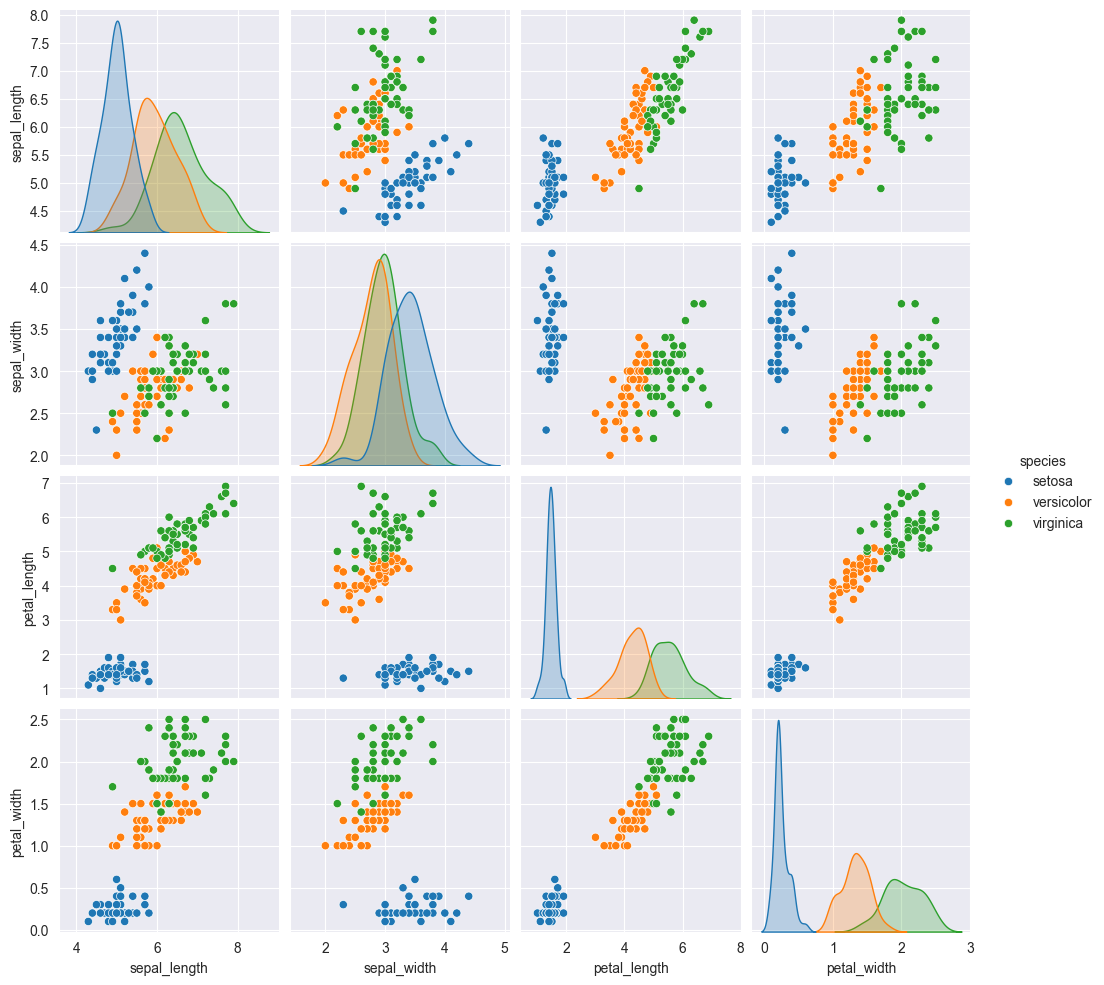

In [13]:
sns.pairplot(iris, hue = 'species')

In [14]:
# 获取数据集的特征值和目标值
X = iris.values[:, :4]
y = iris.values[:, 4]

In [16]:
# 数据集划分
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [17]:
x_train.shape

(75, 4)

In [19]:
x_test.shape

(75, 4)

# 2.sklearn实现鸢尾花

利用逻辑回归的分类器，并使用交叉验证的方法来选择最优的超参数

In [20]:
# 实例化估计器
lr = LogisticRegressionCV()

In [21]:
# 模型训练
lr.fit(x_train, y_train)

LogisticRegressionCV()

In [22]:
# 模型评估
lr.score(x_test, y_test)

0.9333333333333333

# 3.tf,keras实现

## 3.1数据处理

In [23]:
# 目标值的热编码
def one_hot_encode(arr):
    # 获取目标值中的所有类别并进行热编码
    uniques, ids = np.unique(arr, return_inverse=True)
    return utils.to_categorical(ids, len(uniques))

In [24]:
# 对目标值进行编码
y_train_one = one_hot_encode(y_train)

In [25]:
y_test_one = one_hot_encode(y_test)

## 3.2模型构建

In [26]:
# 通过sequential进行构建
model = Sequential([
    # 隐藏层
    Dense(10, activation = 'relu', input_shape = (4, )),
    # 隐藏层
    Dense(10, activation = 'relu'),
    # 输出层
    Dense(3, activation = 'softmax')
])

D:\Software\envs\TYPC\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

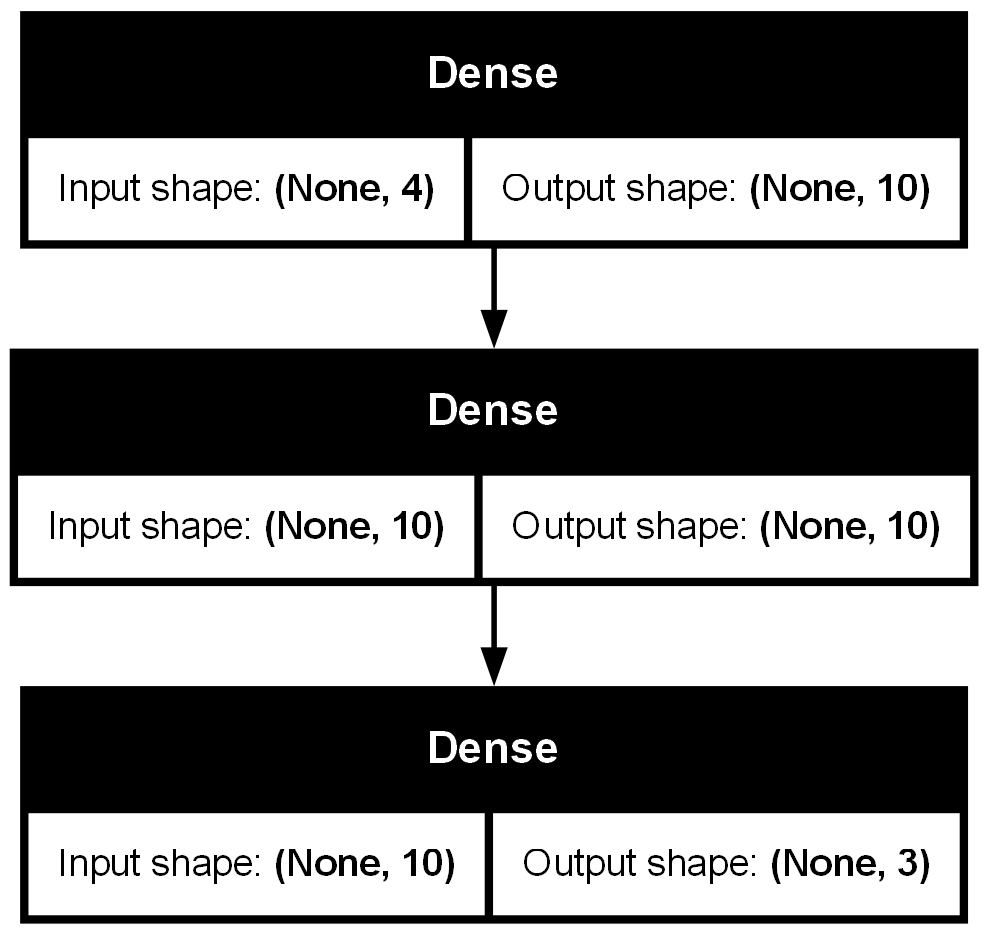

In [29]:
utils.plot_model(model, show_shapes = True)

## 3.3模型预测与评估

In [30]:
# 模型编译
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
# 类型转换
x_train = np.array(x_train, dtype = np.float32)
x_test = np.array(x_test, dtype = np.float32)

In [33]:
# 模型训练
model.fit(x_train, y_train_one, epochs = 10, batch_size = 1, verbose = 1)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3418 - loss: 3.9796
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4292 - loss: 1.7388
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3849 - loss: 1.1165
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6522 - loss: 0.8142
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7603 - loss: 0.6488
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7696 - loss: 0.5702
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6686 - loss: 0.6110
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7808 - loss: 0.4556
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7978 - loss: 0.4442
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8237 - loss: 0.4471


In [34]:
# 模型评估
loss, accuracy = model.evaluate(x_test, y_test_one, verbose = 1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7327 - loss: 0.4990 


In [35]:
loss

0.4996224343776703

In [36]:
accuracy

0.746666669845581